In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def eval_model(input_x, input_y):
    
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)
    
df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

In [47]:
eval_model(X, y)

Accuracy: 0.80000


In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [49]:
pca_model = PCA(n_components=2).fit(X)
X_pca = pca_model.transform(X)
X_new = pca_model.inverse_transform(X_pca)

In [50]:
eval_model(X_new, y)

Accuracy: 0.80000


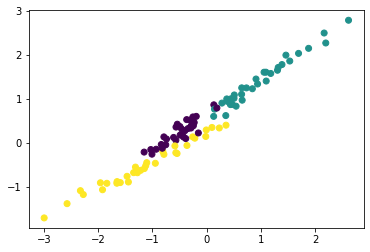

In [51]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

In [52]:
from sklearn.manifold import TSNE

In [60]:
tsne_transformer = TSNE(n_components=2)
X_tsne = tsne_transformer.fit_transform(X)

In [61]:
eval_model(X_tsne, y)

Accuracy: 0.96667


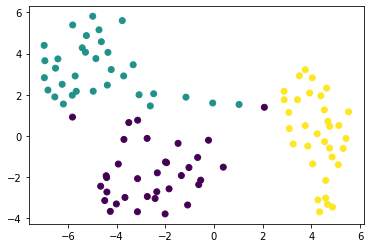

In [62]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)